<a href="https://colab.research.google.com/github/sandeshragashetty22/DBS_web_dev_IS_system_CA/blob/main/Applied_research_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
# from fbprophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Load the data from the uploaded CSV file
file_path = '/content/sample_data/Agrofood_co2_emission.csv'
data = pd.read_csv(file_path)

## Data Preparation

**Feature selection**

In [ ]:
# Consider only relevant columns
columns = [
    'Area', 'Year', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)',
    'Pesticides Manufacturing', 'Agrifood Systems Waste Disposal', 'Food Processing',
    'Fertilizers Manufacturing', 'Manure applied to Soils', 'Fires in organic soils',
    'Average Temperature °C'
]

data = data[columns]

In [ ]:
# Calculate the total emission
data['total_emission'] = data[
    ['Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 'Pesticides Manufacturing',
     'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing',
     'Manure applied to Soils', 'Fires in organic soils']
].sum(axis=1)

**Data Understanding step**

In [ ]:
data.head()

,Area,Year,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,Manure applied to Soils,Fires in organic soils,Average Temperature °C,total_emission
0,Afghanistan,1990,205.6077,686.00,0.0,11.807483,691.7888,252.21419,11.9970,260.1431,0.0,0.536167,2119.558273
1,Afghanistan,1991,209.4971,678.16,0.0,11.712073,710.8212,252.21419,12.8539,268.6292,0.0,0.020667,2143.887663
2,Afghanistan,1992,196.5341,686.00,0.0,11.712073,743.6751,252.21419,13.4929,264.7898,0.0,-0.259583,2168.418163
3,Afghanistan,1993,230.8175,686.00,0.0,11.712073,791.9246,252.21419,14.0559,261.7221,0.0,0.101917,2248.446363
4,Afghanistan,1994,242.0494,705.60,0.0,11.712073,831.9181,252.21419,15.1269,267.6219,0.0,0.372250,2326.242563


**Data Understanding step**

In [ ]:
# Descriptive Statistics
data.describe()

,Year,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,Manure applied to Soils,Fires in organic soils,Average Temperature °C,total_emission
count,6965.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6037.000000,6965.000000,6965.000000,6.965000e+03
mean,2005.124910,998.706309,4259.666673,3503.228636,333.418393,6018.444633,3872.724461,3035.723356,923.225603,1210.315532,0.872989,2.383328e+04
std,8.894665,3700.345330,17613.825187,15861.445678,1429.159367,22156.742542,19838.216846,11693.029064,3226.992039,22669.847760,0.555930,8.607752e+04
min,1990.000000,0.000200,0.000000,0.000000,0.000000,0.340000,0.000100,0.001900,0.049000,0.000000,-1.415833,5.695354e+02
25%,1997.000000,11.006525,181.260800,0.000000,6.000000,86.680500,209.587728,360.358799,16.303000,0.000000,0.511333,2.946790e+03
50%,2005.000000,103.698200,534.817400,0.000000,13.000000,901.275700,344.760200,1115.052400,120.443900,0.000000,0.834300,5.117536e+03
75%,2013.000000,377.640975,1536.640000,690.408800,116.325487,3006.442100,1236.913400,2024.869900,460.120200,0.000000,1.206750,1.152193e+04
max,2020.000000,33490.074100,164915.255600,241025.069600,16459.000000,213289.701600,274253.512500,170826.423300,34677.360300,991717.543100,3.558083,1.328395e+06


**Data Understanding step**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Crop Residues                    5576 non-null   float64
 3   Rice Cultivation                 6965 non-null   float64
 4   Drained organic soils (CO2)      6965 non-null   float64
 5   Pesticides Manufacturing         6965 non-null   float64
 6   Agrifood Systems Waste Disposal  6965 non-null   float64
 7   Food Processing                  6965 non-null   float64
 8   Fertilizers Manufacturing        6965 non-null   float64
 9   Manure applied to Soils          6037 non-null   float64
 10  Fires in organic soils           6965 non-null   float64
 11  Average Temperature °C           6965 non-null   float64
 12  total_emission      

In [ ]:
# Identifing the numerical and non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Non-numeric columns:", non_numeric_columns)
print("Numeric columns:", numerical_cols)

Non-numeric columns: Index(['Area'], dtype='object')
Numeric columns: Index(['Year', 'Crop Residues', 'Rice Cultivation',
       'Drained organic soils (CO2)', 'Pesticides Manufacturing',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'Manure applied to Soils',
       'Fires in organic soils', 'Average Temperature °C', 'total_emission'],
      dtype='object')


In [ ]:
# check the missing values
data.isnull().sum()

Area                                  0
Year                                  0
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
Manure applied to Soils             928
Fires in organic soils                0
Average Temperature °C                0
total_emission                        0
dtype: int64

**Data Understanding step**

In [ ]:
# Fill missing values with the median of each column, specifying numeric_only=True
data_filled = data.fillna(data.median(numeric_only=True))

#Verify if there are any missing values left
data_filled.isnull().sum()

Area                               0
Year                               0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
Manure applied to Soils            0
Fires in organic soils             0
Average Temperature °C             0
total_emission                     0
dtype: int64

In [ ]:
# # Identify categorical and numerical columns
# categorical_cols = data.select_dtypes(include=['object']).columns
# numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# print(categorical_cols)
# print(numerical_cols)

# # # Display unique values in non-numeric columns to identify potential issues
# # for column in non_numeric_columns:
# # print(f"Unique values in column '{column}': {data[column].unique()}")

**Data Preparation step**

Below step is redudunt and try to run without this, and remove it once confirmed it is redundunt.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale features excluding categorical columns and the target variable
features = data.drop(columns=['total_emission', 'Area', 'Average Temperature °C'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
# Create a DataFrame for scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['total_emission'] = data['total_emission']
scaled_data['Area'] = data['Area']

In [ ]:
#dropping non numeric values like area
numeric_data = data.drop(columns=non_numeric_columns)

## Exploratory Data analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**1. Time series Analysis**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Aggregating data for all areas
total_emission_over_time = data.groupby('Year')['total_emission'].sum()
avg_temp_over_time = data.groupby('Year')['Average Temperature °C'].mean()

# Emissions breakdown by category over time
emission_categories = ['Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)',
    'Pesticides Manufacturing', 'Agrifood Systems Waste Disposal', 'Food Processing',
    'Fertilizers Manufacturing', 'Manure applied to Soils', 'Fires in organic soils']

emission_over_time = data.groupby('Year')[emission_categories].sum()

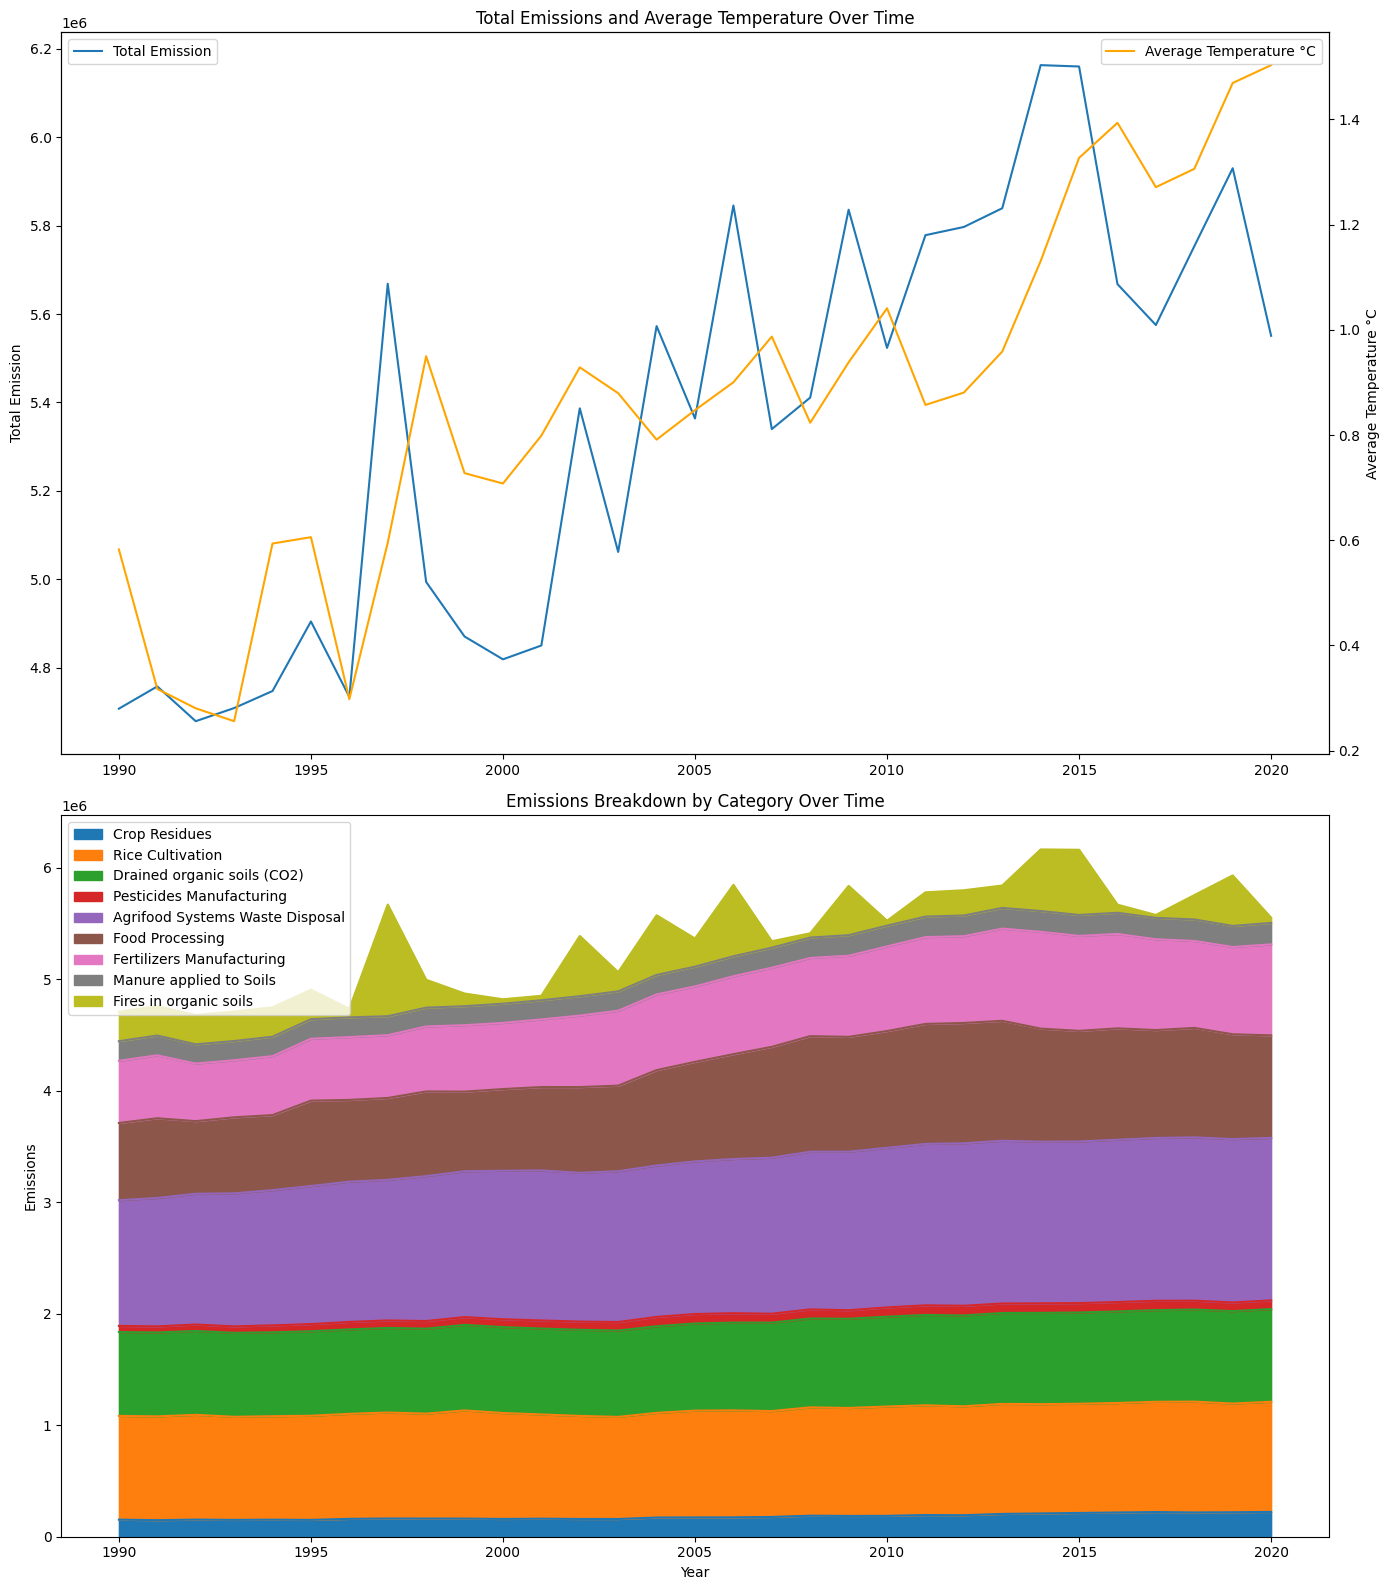

In [ ]:
# Rolling mean for trend analysis
rolling_window = 5
total_emission_rolling = total_emission_over_time.rolling(window=rolling_window).mean()
avg_temp_rolling = avg_temp_over_time.rolling(window=rolling_window).mean()

# Plotting the visualizations
fig, axes = plt.subplots(2, 1, figsize=(14, 16))

# Total Emissions and Average Temperature Over Time
axes[0].plot(total_emission_over_time, label='Total Emission')
axes[0].set_ylabel('Total Emission')
axes_0b = axes[0].twinx()
axes_0b.plot(avg_temp_over_time, color='orange', label='Average Temperature °C')
axes_0b.set_ylabel('Average Temperature °C')
axes[0].set_title('Total Emissions and Average Temperature Over Time')
axes[0].legend(loc='upper left')
axes_0b.legend(loc='upper right')


# Emissions Breakdown by Category Over Time
emission_over_time.plot(kind='area', stacked=True, ax=axes[1])
axes[1].set_title('Emissions Breakdown by Category Over Time')
axes[1].set_ylabel('Emissions')
axes[1].set_xlabel('Year')
plt.tight_layout()
plt.show()

**Distribution of Average Temperature by Years**

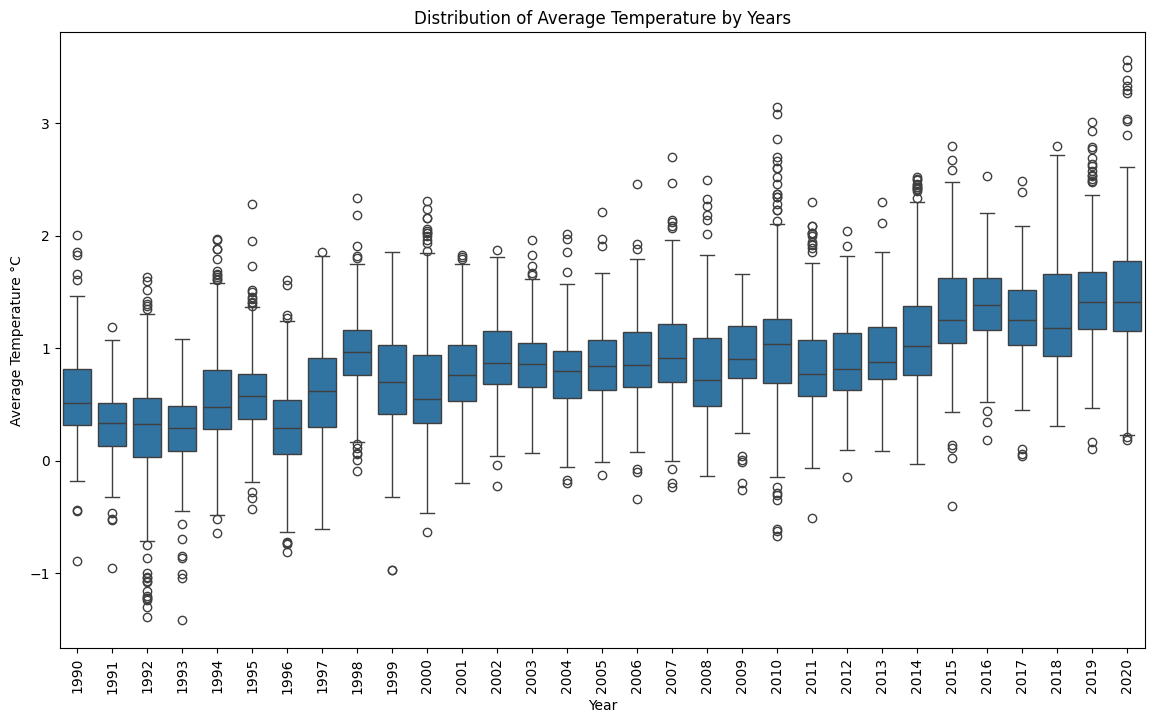

In [ ]:
# Distribution of Average Temperature by Years
plt.figure(figsize=(14, 8))
sns.boxplot(x='Year', y='Average Temperature °C', data=data)
plt.title('Distribution of Average Temperature by Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature °C')
plt.xticks(rotation=90)
plt.show()

**3. Correlation Matrix**


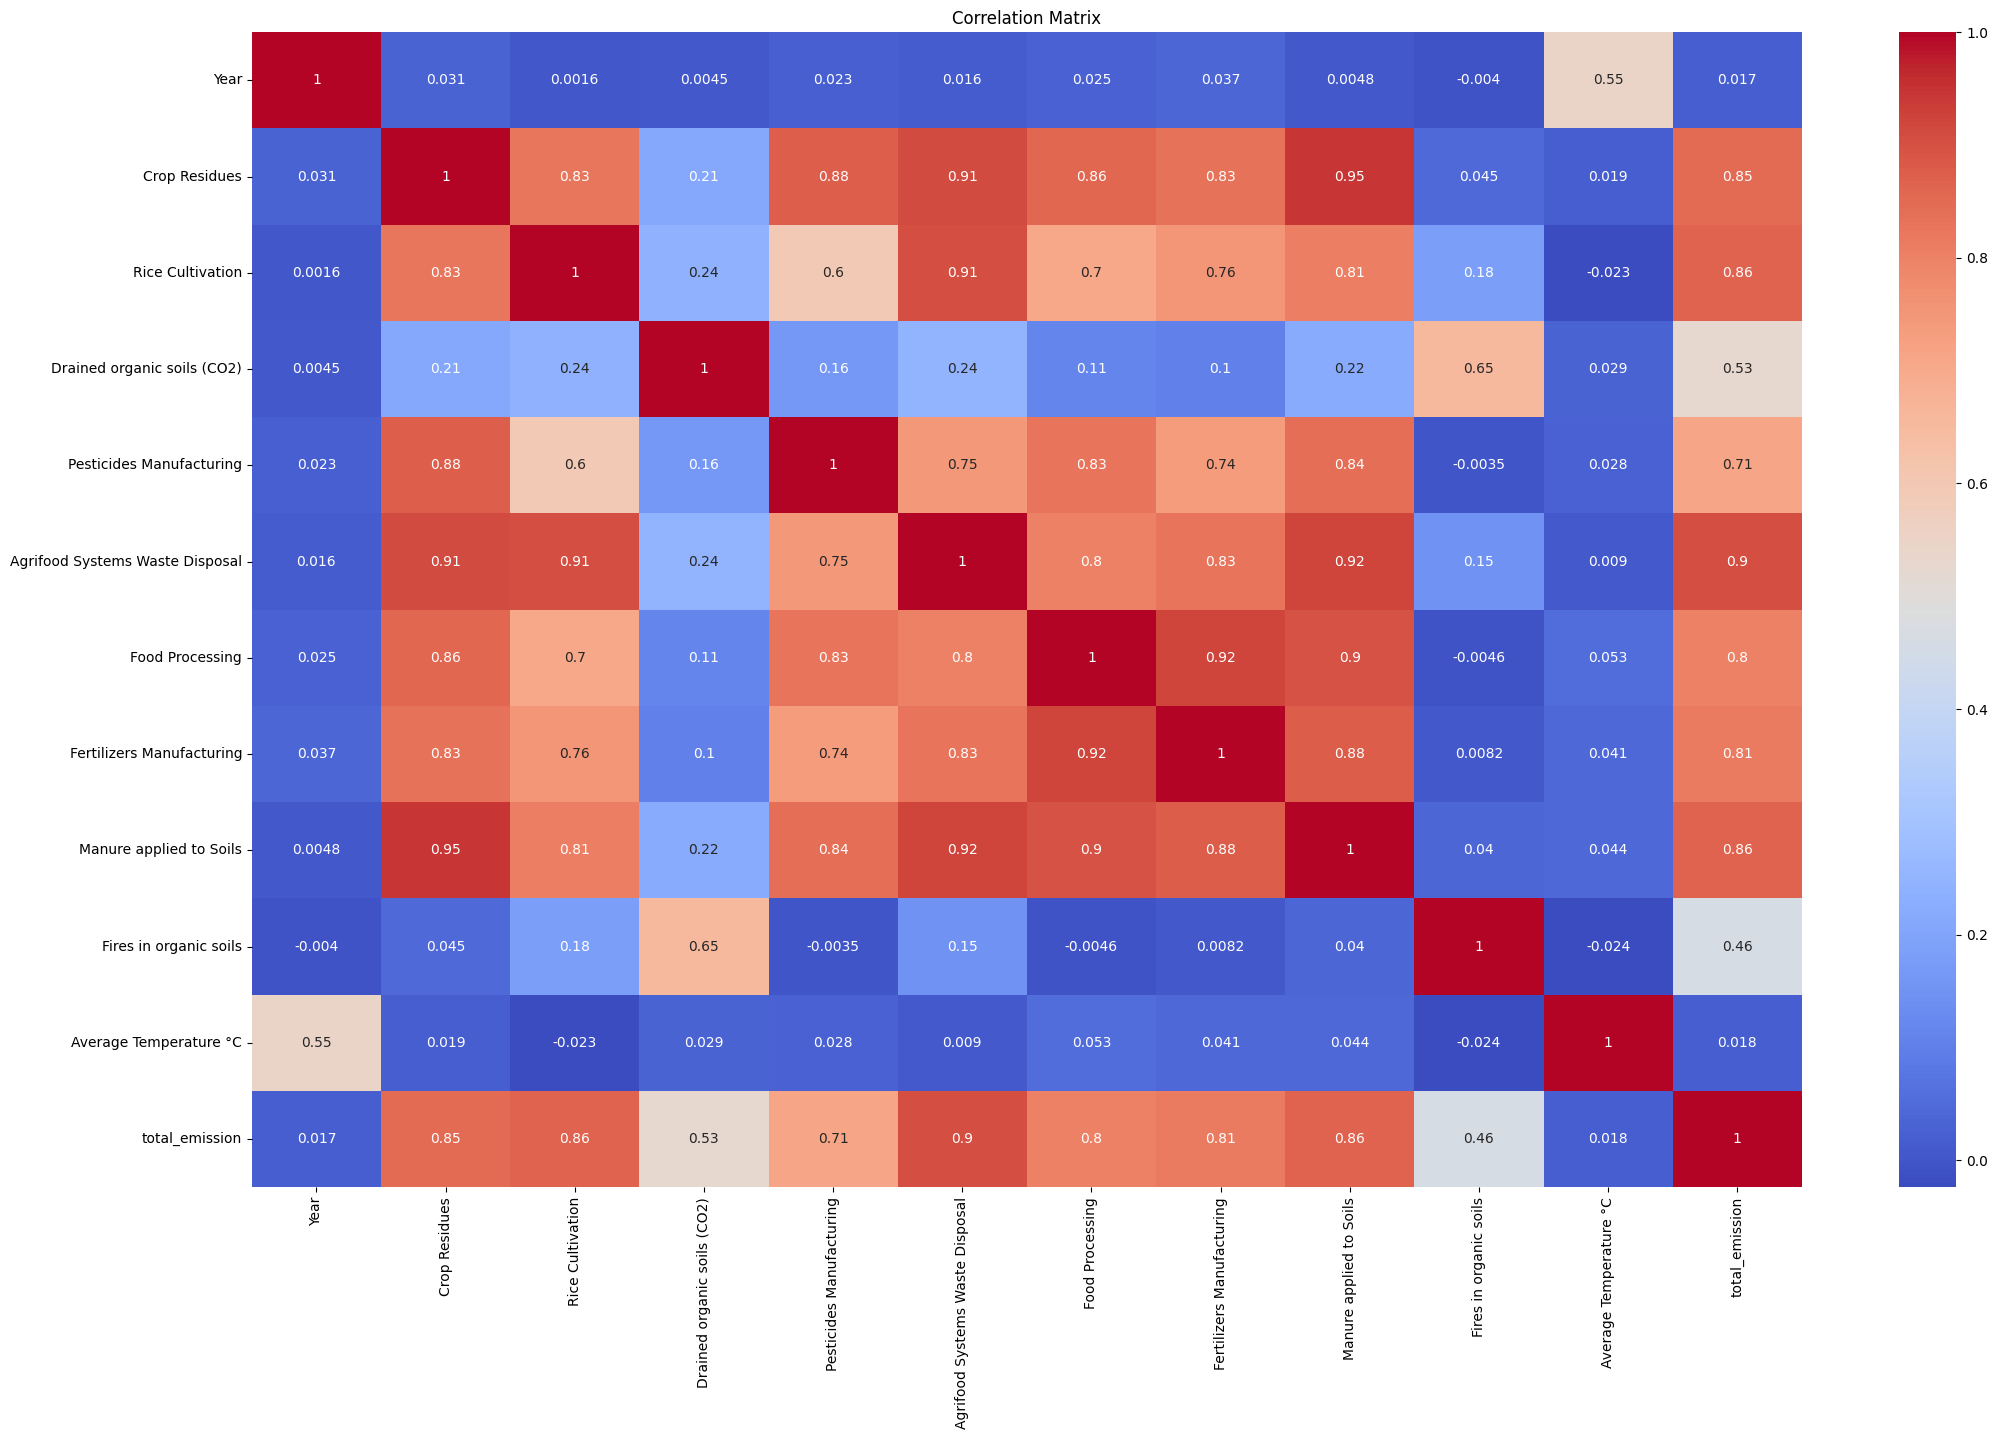

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(25, 15))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**4. Impact of different countries**

In [ ]:
country_data = data.groupby('Area').agg({
    'total_emission': 'sum',
    'Average Temperature °C': 'mean'
}).reset_index()

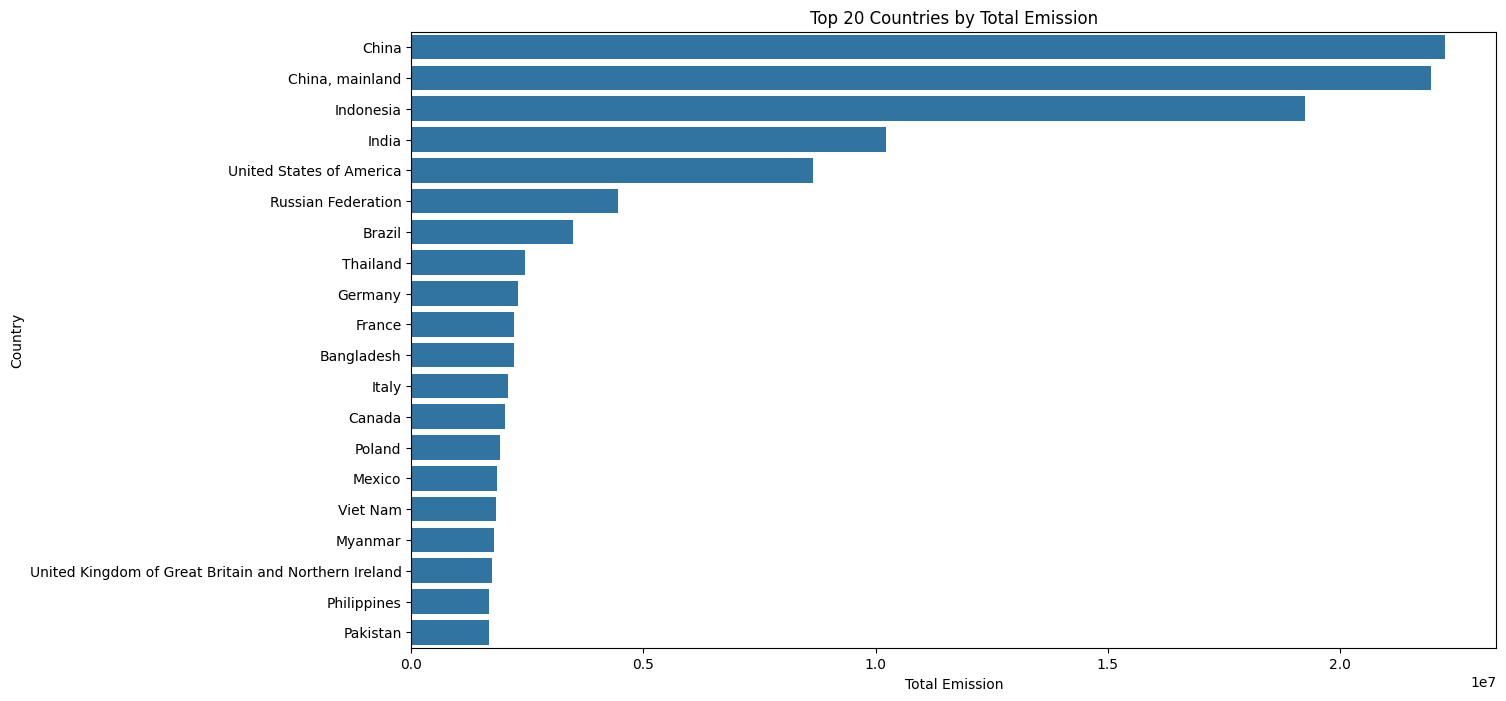

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='total_emission', y='Area', data=country_data.sort_values(by='total_emission', ascending=False).head(20))
plt.title('Top 20 Countries by Total Emission')
plt.xlabel('Total Emission')
plt.ylabel('Country')
plt.show()

finalize the below code

In [ ]:
# # Scatterplot of Total Emission vs Average Temperature
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Average Temperature °C', y='total_emission', data=data)
# plt.title('Scatterplot of Total Emission vs Average Temperature')
# plt.xlabel('Average Temperature °C')
# plt.ylabel('Total Emission')
# plt.show()

**2. Mean CO2 Emissions for All Factors**

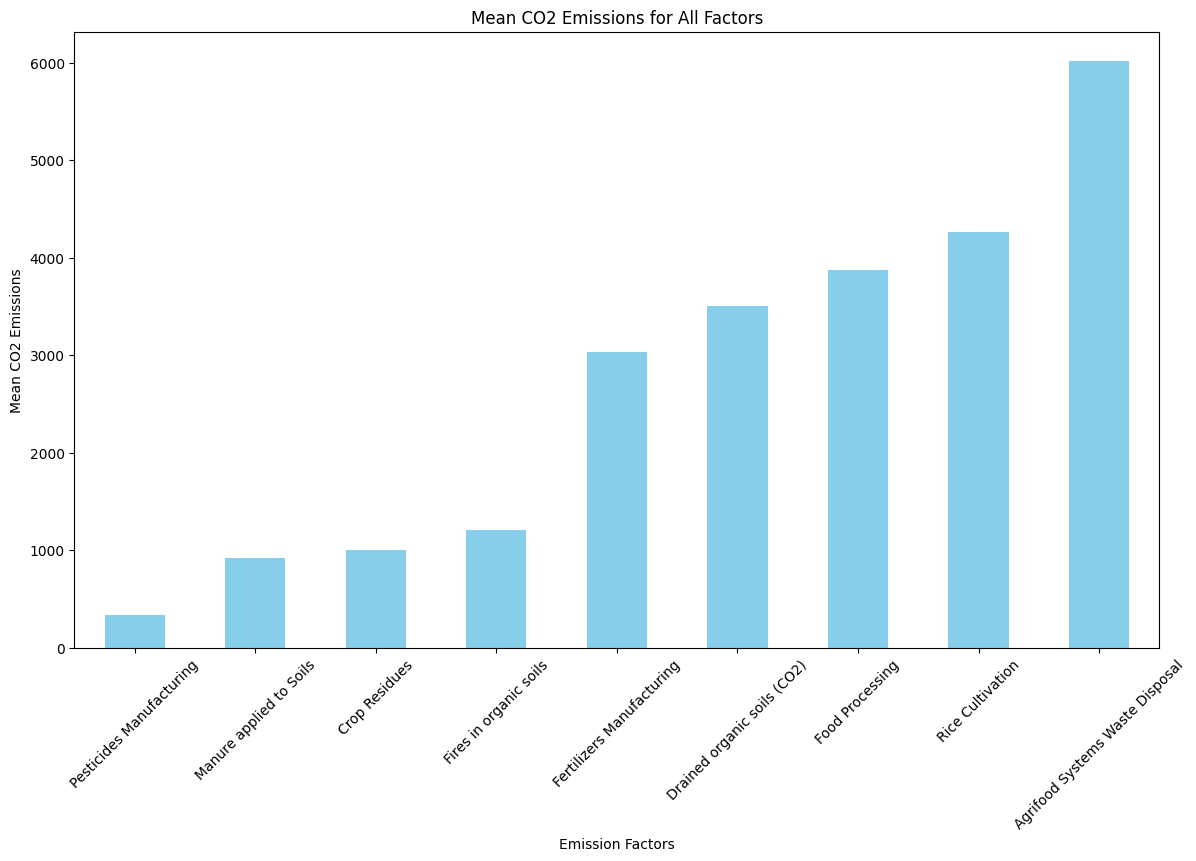

In [ ]:
# Calculate the mean CO2 emissions for all factors
emission_factors = [
    'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 'Pesticides Manufacturing',
    'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing',
    'Manure applied to Soils', 'Fires in organic soils'
]

mean_emissions = data[emission_factors].mean().sort_values()

# Mean CO2 Emissions for All Factors
plt.figure(figsize=(14, 8))
mean_emissions.plot(kind='bar', color='skyblue')
plt.title('Mean CO2 Emissions for All Factors')
plt.xlabel('Emission Factors')
plt.ylabel('Mean CO2 Emissions')
plt.xticks(rotation=45)
plt.show()


**6. Bar Plot of Total Emissions for Each Year**

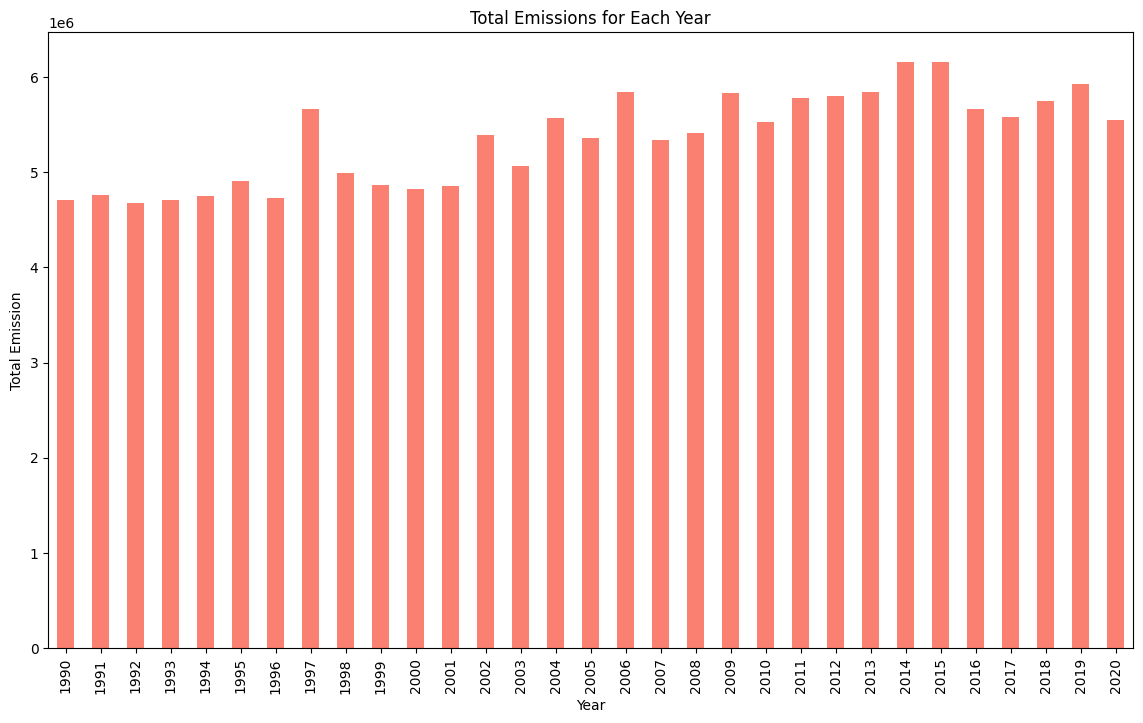

In [ ]:
# Bar Plot of Total Emissions for Each Year
plt.figure(figsize=(14, 8))
total_emissions_year = data.groupby('Year')['total_emission'].sum()
total_emissions_year.plot(kind='bar', color='salmon')
plt.title('Total Emissions for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Emission')
plt.xticks(rotation=90)
plt.show()


**7. Histogram of Average Temperature**

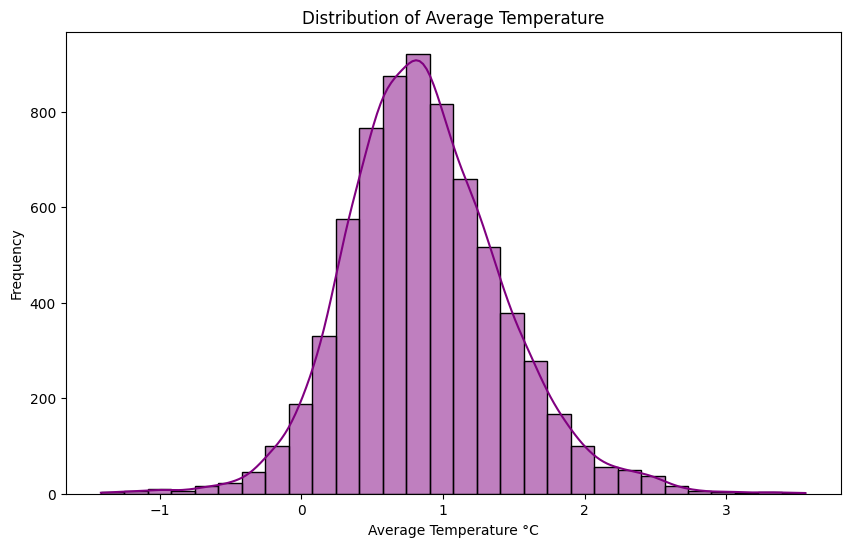

In [ ]:
# Histogram of Average Temperature
plt.figure(figsize=(10, 6))
sns.histplot(data['Average Temperature °C'], bins=30, kde=True, color='purple')
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature °C')
plt.ylabel('Frequency')
plt.show()


## Model Training and Evaluation

**Data Preparation step**

In [ ]:
# Required libraries for model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Split the data into features and target variables
# Assuming 'CO2_Emissions' and 'Temperature' were the original target variable columns
# Find the dummy columns related to these original columns
emission_columns = [col for col in data.columns if 'total_emission' in col]
temperature_columns = [col for col in data.columns if 'Average Temperature °C' in col]

# Drop the dummy columns related to the target variables to get the features
X = data.drop(emission_columns + temperature_columns, axis=1)
X = data.drop(columns=['Area', 'Year'])

# Extract the dummy columns related to the target variables
y_emissions = data[emission_columns]
y_temperature = data[temperature_columns]

In [ ]:
# Split the data into training and testing sets
X_train_emissions, X_test_emissions, y_train_emissions, y_test_emissions = train_test_split(X, y_emissions, test_size=0.2, random_state=42)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temperature, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_emissions = scaler.fit_transform(X_train_emissions)
X_test_emissions = scaler.transform(X_test_emissions)
X_train_temp = scaler.fit_transform(X_train_temp)
X_test_temp = scaler.transform(X_test_temp)

In [ ]:
# Helper function for evaluation metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

In [ ]:
from sklearn.impute import SimpleImputer
#Impute missing values (using mean imputation as an example)
imputer = SimpleImputer(strategy='mean')
X_train_emissions_imputed = imputer.fit_transform(X_train_emissions)
X_test_emissions_imputed = imputer.transform(X_test_emissions)

X_train_temp_imputed = imputer.fit_transform(X_train_temp)
X_test_temp_imputed = imputer.transform(X_test_temp)

**Linear Regression**

In [ ]:
# Linear Regression
lr_emissions = LinearRegression()
lr_emissions.fit(X_train_emissions_imputed, y_train_emissions)
y_pred_lr_emissions = lr_emissions.predict(X_test_emissions_imputed)
lr_metrics_emissions = evaluate_model(y_test_emissions, y_pred_lr_emissions)

lr_temp = LinearRegression()
lr_temp.fit(X_train_temp_imputed, y_train_temp)
y_pred_lr_temp = lr_temp.predict(X_test_temp_imputed)
lr_metrics_temp = evaluate_model(y_test_temp, y_pred_lr_temp)

**Decision Tree Model**

In [ ]:
# Decision Tree Hyperparameter Tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Decision Tree
dt_emission = DecisionTreeRegressor(random_state=42)
grid_search_dt_emission = GridSearchCV(estimator=dt_emission, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='r2')
grid_search_dt_emission.fit(X_train_emissions_imputed, y_train_emissions)
best_dt_emission = grid_search_dt_emission.best_estimator_
y_pred_emission_dt = best_dt_emission.predict(X_test_emissions_imputed)
dt_metrics_emissions = evaluate_model(y_test_emissions, y_pred_emission_dt)

dt_temp = DecisionTreeRegressor(random_state=42)
grid_search_dt_temp = GridSearchCV(estimator=dt_temp, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='r2')
grid_search_dt_temp.fit(X_train_temp_imputed, y_train_temp)
best_dt_temp = grid_search_dt_temp.best_estimator_
y_pred_temp_dt = best_dt_temp.predict(X_test_temp_imputed)
dt_metrics_temp = evaluate_model(y_test_temp, y_pred_temp_dt)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


**Random Forest**

In [ ]:
# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Random Forest
rf_emission = RandomForestRegressor(random_state=42)
random_search_rf_emission  = RandomizedSearchCV(estimator=rf_emission, param_distributions=param_grid_rf, n_iter=10, cv=3, n_jobs=-1, scoring='r2', random_state=42)
random_search_rf_emission.fit(X_train_emissions_imputed, y_train_emissions)
best_rf_emission = random_search_rf_emission.best_estimator_
y_pred_emission_rf = best_rf_emission.predict(X_test_emissions_imputed)
rf_metrics_emissions = evaluate_model(y_test_emissions, y_pred_emission_rf)

rf_temp = RandomForestRegressor(random_state=42)
random_search_rf_temp = RandomizedSearchCV(estimator=rf_temp, param_distributions=param_grid_rf,
                                           n_iter=10, cv=3, n_jobs=-1, scoring='r2', random_state=42)
random_search_rf_temp.fit(X_train_temp_imputed, y_train_temp)
best_rf_temp = random_search_rf_temp.best_estimator_
y_pred_temp_rf = best_rf_temp.predict(X_test_temp_imputed)
rf_metrics_temp = evaluate_model(y_test_temp, y_pred_temp_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


**Neural Network**

In [ ]:
#Nueral network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Function to create and compile the neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
# Neural Network for CO2 Emissions
model_emission = create_model(input_dim=X_train_emissions_imputed.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_emission = model_emission.fit(X_train_emissions_imputed, y_train_emissions,
                                      validation_split=0.2,
                                      epochs=100,
                                      batch_size=32,
                                      callbacks=[early_stopping],
                                      verbose=1)

Epoch 1/100
140/140 [==============================] - 1s 3ms/step - loss: 7602946560.0000 - val_loss: 6842030592.0000
Epoch 2/100
140/140 [==============================] - 0s 2ms/step - loss: 7584915456.0000 - val_loss: 6809629184.0000
Epoch 3/100
140/140 [==============================] - 0s 2ms/step - loss: 7508307968.0000 - val_loss: 6706509824.0000
Epoch 4/100
140/140 [==============================] - 0s 2ms/step - loss: 7344392704.0000 - val_loss: 6521926656.0000
Epoch 5/100
140/140 [==============================] - 0s 2ms/step - loss: 7059136000.0000 - val_loss: 6220322816.0000
Epoch 6/100
140/140 [==============================] - 0s 2ms/step - loss: 6634099712.0000 - val_loss: 5789622272.0000
Epoch 7/100
140/140 [==============================] - 0s 2ms/step - loss: 6081013760.0000 - val_loss: 5263900672.0000
Epoch 8/100
140/140 [==============================] - 0s 2ms/step - loss: 5417699840.0000 - val_loss: 4666451456.0000
Epoch 9/100
140/140 [===========================

In [ ]:
# Predictions and evaluation for CO2 Emissions
y_pred_emission_nn = model_emission.predict(X_test_emissions_imputed)
nn_metrics_emissions = evaluate_model(y_test_emissions, y_pred_emission_nn)

44/44 [==============================] - 0s 1ms/step


In [ ]:
# Neural Network for Temperature
model_temp = create_model(input_dim=X_train_temp_imputed.shape[1])
history_temp = model_temp.fit(X_train_temp_imputed, y_train_temp,
                              validation_split=0.2,
                              epochs=100,
                              batch_size=32,
                              callbacks=[early_stopping],
                              verbose=1)

Epoch 1/100
140/140 [==============================] - 2s 4ms/step - loss: 0.1773 - val_loss: 0.0213
Epoch 2/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0124 - val_loss: 0.0091
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0069
Epoch 4/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 5/100
140/140 [==============================] - 1s 5ms/step - loss: 0.0081 - val_loss: 0.0023
Epoch 6/100
140/140 [==============================] - 1s 4ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 7/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 8/100
140/140 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 9/100
140/140 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/100
140/140 [==============================] - 0s 2ms/step - loss: 0.0028 - val_lo

In [ ]:
# Predictions and evaluation for Temperature
y_pred_temp_nn = model_temp.predict(X_test_temp_imputed)
nn_metrics_temp = evaluate_model(y_test_temp, y_pred_temp_nn)

44/44 [==============================] - 0s 1ms/step


In [ ]:
# Print neural network metrics
print(f"Neural Network - CO2 Emissions: MSE: {nn_metrics_emissions[0]:.4f}, RMSE: {nn_metrics_emissions[1]:.4f}, MAE: {nn_metrics_emissions[2]:.4f}, R2: {nn_metrics_emissions[3]:.4f}")
print(f"Neural Network - Temperature: MSE: {nn_metrics_temp[0]:.4f}, RMSE: {nn_metrics_temp[1]:.4f}, MAE: {nn_metrics_temp[2]:.4f}, R2: {nn_metrics_temp[3]:.4f}")

Neural Network - CO2 Emissions: MSE: 266481.8943, RMSE: 516.2188, MAE: 357.5455, R2: 1.0000
Neural Network - Temperature: MSE: 0.0005, RMSE: 0.0223, MAE: 0.0087, R2: 0.9984


**Plotting and Analysis**

**Comparative Analysis**

In [ ]:
# Create a DataFrame to compare model performance
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network'],
    'MSE (Emissions)': [lr_metrics_emissions[0], dt_metrics_emissions[0], rf_metrics_emissions[0], nn_metrics_emissions[0]],
    'RMSE (Emissions)': [lr_metrics_emissions[1], dt_metrics_emissions[1], rf_metrics_emissions[1], nn_metrics_emissions[1]],
    'MAE (Emissions)': [lr_metrics_emissions[2], dt_metrics_emissions[2], rf_metrics_emissions[2], nn_metrics_emissions[2]],
    'R2 (Emissions)': [lr_metrics_emissions[3], dt_metrics_emissions[3], rf_metrics_emissions[3], nn_metrics_emissions[3]],
    'MSE (Temperature)': [lr_metrics_temp[0], dt_metrics_temp[0], rf_metrics_temp[0], nn_metrics_temp[0]],
    'RMSE (Temperature)': [lr_metrics_temp[1], dt_metrics_temp[1], rf_metrics_temp[1], nn_metrics_temp[1]],
    'MAE (Temperature)': [lr_metrics_temp[2], dt_metrics_temp[2], rf_metrics_temp[2], nn_metrics_temp[2]],
    'R2 (Temperature)': [lr_metrics_temp[3], dt_metrics_temp[3], rf_metrics_temp[3], nn_metrics_temp[3]]
})

print(metrics)

               Model  MSE (Emissions)  RMSE (Emissions)  MAE (Emissions)  \
0  Linear Regression     1.255436e-20      1.120462e-10     4.197117e-11   
1      Decision Tree     1.636819e+08      1.279382e+04     6.212093e+02   
2      Random Forest     1.382067e+08      1.175613e+04     5.207399e+02   
3     Neural Network     2.664819e+05      5.162188e+02     3.575455e+02   

   R2 (Emissions)  MSE (Temperature)  RMSE (Temperature)  MAE (Temperature)  \
0        1.000000       9.333874e-32        3.055139e-16       1.915156e-16   
1        0.982652       5.291530e-05        7.274290e-03       1.130155e-03   
2        0.985352       7.197985e-06        2.682906e-03       5.895593e-04   
3        0.999972       4.965362e-04        2.228309e-02       8.678799e-03   

   R2 (Temperature)  
0          1.000000  
1          0.999827  
2          0.999977  
3          0.998380  


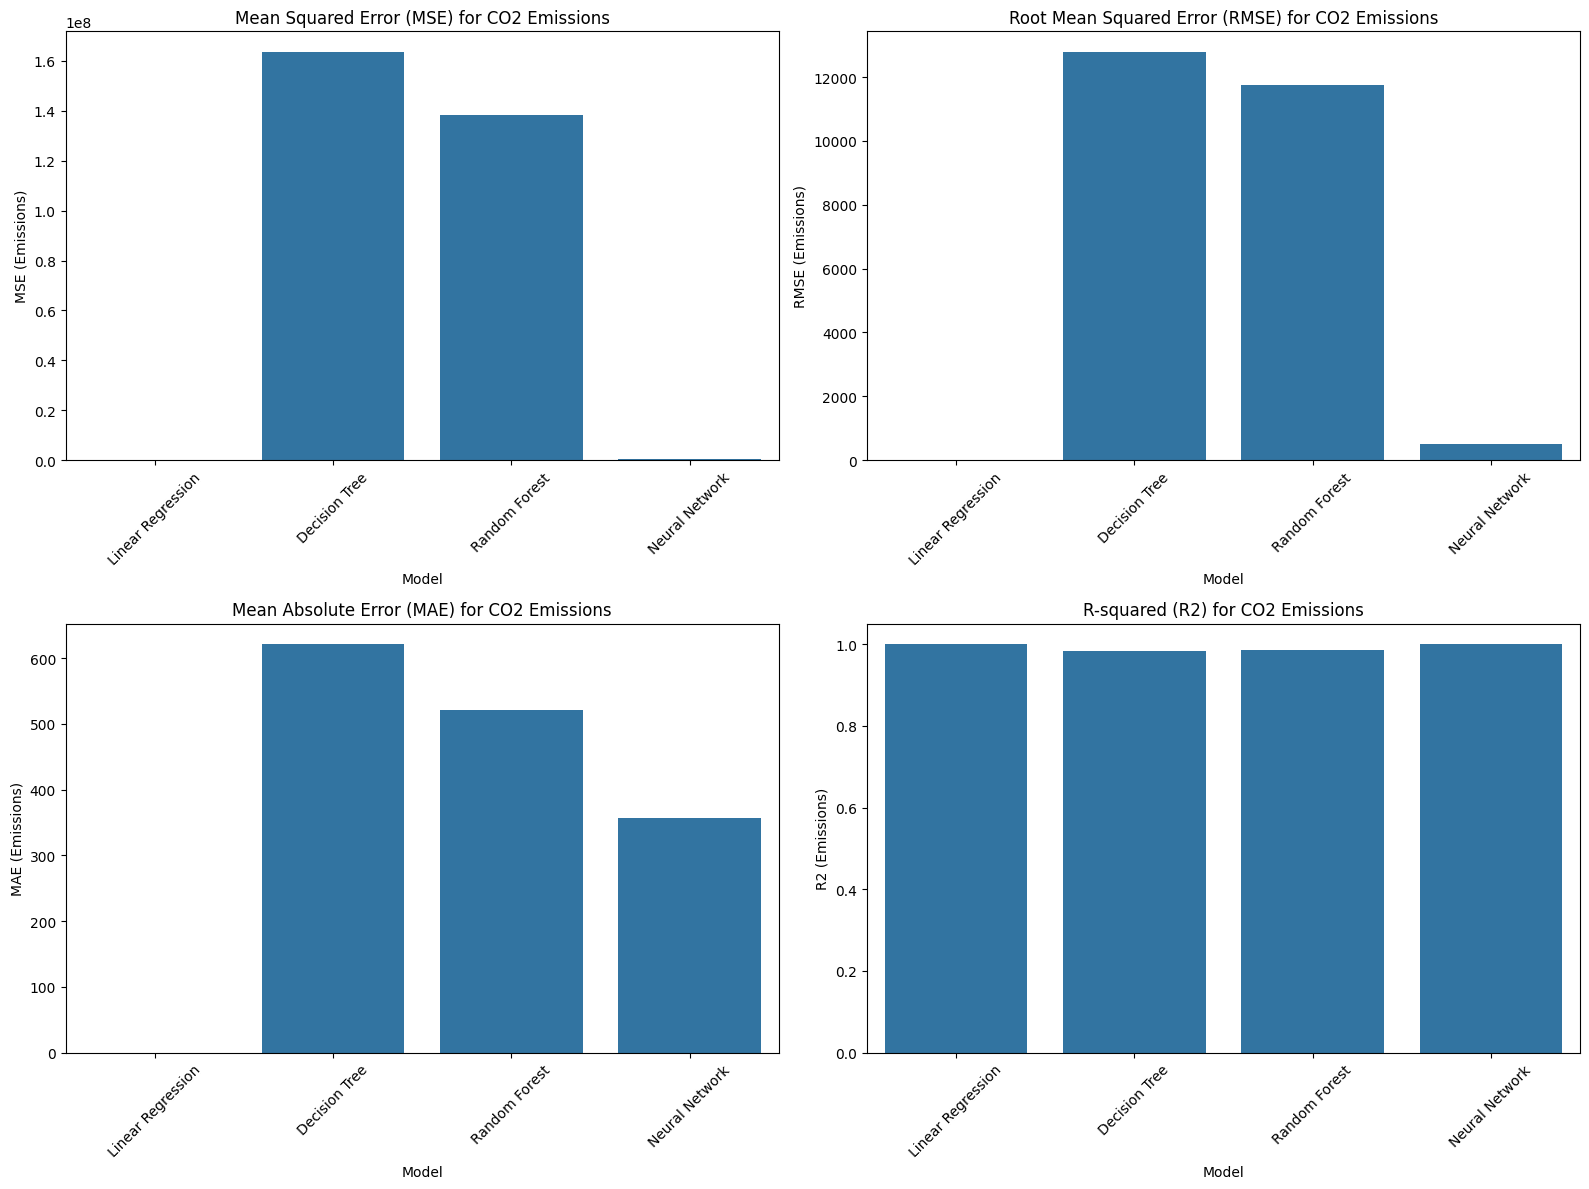

In [ ]:
# Visualization: Comparison Metrics
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='MSE (Emissions)', data=metrics)
plt.title('Mean Squared Error (MSE) for CO2 Emissions')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='RMSE (Emissions)', data=metrics)
plt.title('Root Mean Squared Error (RMSE) for CO2 Emissions')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='MAE (Emissions)', data=metrics)
plt.title('Mean Absolute Error (MAE) for CO2 Emissions')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='R2 (Emissions)', data=metrics)
plt.title('R-squared (R2) for CO2 Emissions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


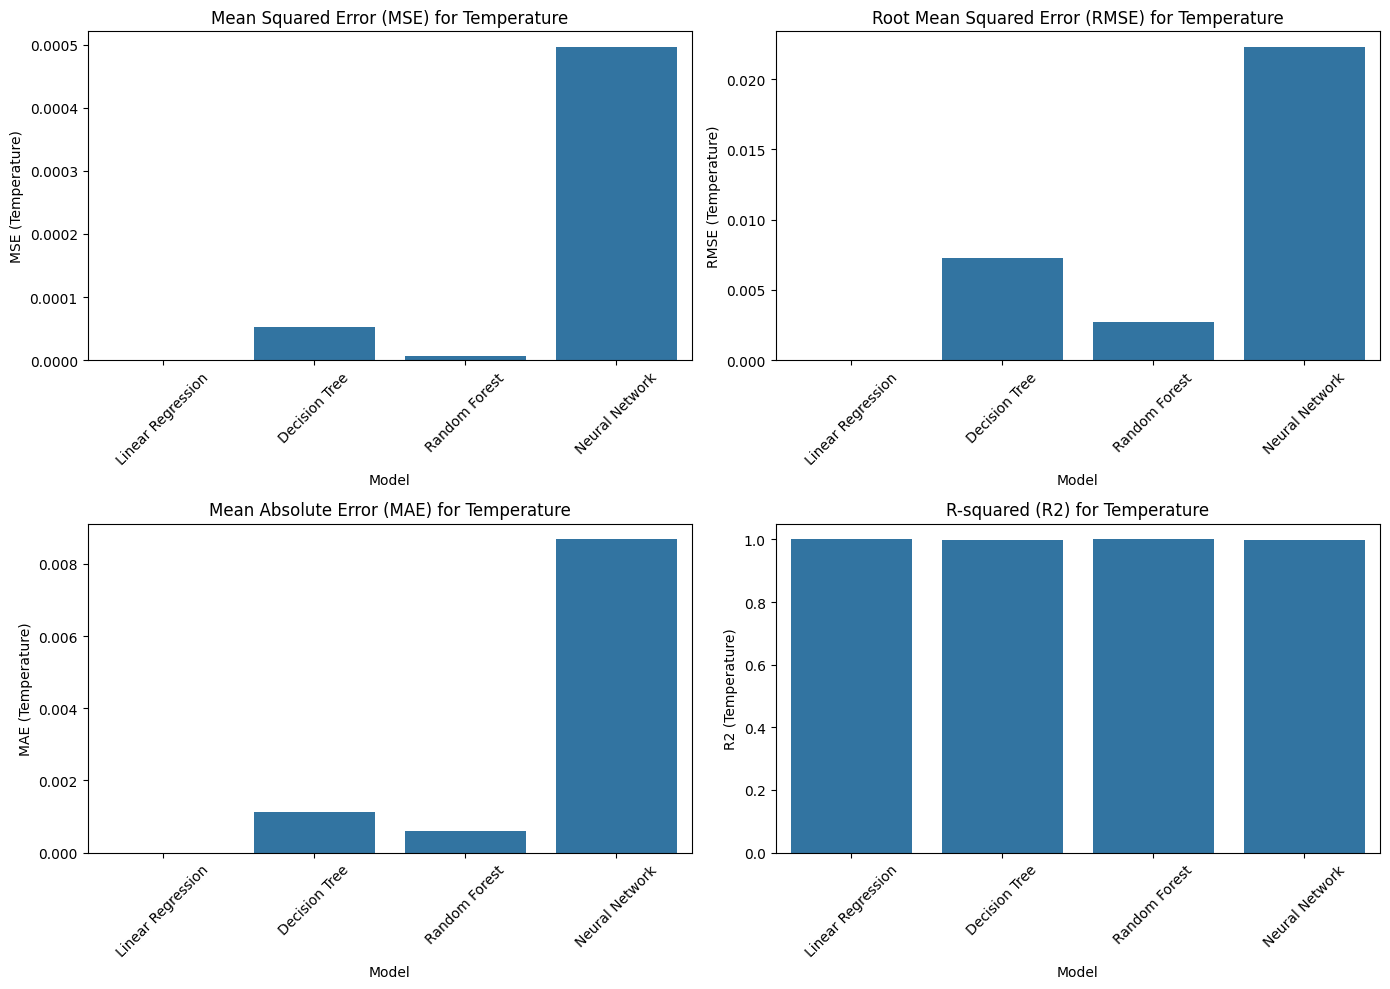

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='MSE (Temperature)', data=metrics)
plt.title('Mean Squared Error (MSE) for Temperature')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='RMSE (Temperature)', data=metrics)
plt.title('Root Mean Squared Error (RMSE) for Temperature')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='MAE (Temperature)', data=metrics)
plt.title('Mean Absolute Error (MAE) for Temperature')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='R2 (Temperature)', data=metrics)
plt.title('R-squared (R2) for Temperature')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Combine features and targets
X_full = data.drop(['total_emission', 'Average Temperature °C', 'Area'], axis=1)
y_full_emission = data['total_emission']
y_full_temp = data['Average Temperature °C']
X_full_dropna = X_full.dropna()

# Correspondingly drop the same rows from the target variables
y_full_emission_dropna = y_full_emission[X_full_dropna.index]
y_full_temp_dropna = y_full_temp[X_full_dropna.index]

# Train the model on the entire dataset
lr_full_emission = LinearRegression()
lr_full_emission.fit(X_full_dropna, y_full_emission_dropna)

lr_full_temp = LinearRegression()
lr_full_temp.fit(X_full_dropna, y_full_temp_dropna)


LinearRegression()

In [ ]:
import pandas as pd
import numpy as np

# Generate future feature values
# Here we assume the 'Year' is one of the features and we want to predict for the next 5 years
future_years = np.arange(data['Year'].max() + 1, data['Year'].max() + 6).reshape(-1, 1)
future_features = pd.DataFrame(future_years, columns=['Year'])

# Assuming other features remain constant or you have some way to predict them
# For simplicity, we will assume other features remain constant and use their mean values
for feature in X_full.columns:
    if feature != 'Year':
        future_features[feature] = data[feature].mean()

# Predict future emissions and temperatures
future_emission_pred = lr_full_emission.predict(future_features)
future_temp_pred = lr_full_temp.predict(future_features)

# Combine current and future data for plotting
future_data = future_features.copy()
future_data['total_emission'] = future_emission_pred
future_data['Average Temperature °C'] = future_temp_pred

current_data = data[['Year', 'total_emission', 'Average Temperature °C']]
combined_data = pd.concat([current_data, future_data])


In [ ]:
# Calculate average values for historical data
historical_avg_emission = data.groupby('Year')['total_emission'].mean()
historical_avg_temp = data.groupby('Year')['Average Temperature °C'].mean()


In [ ]:
# Create DataFrame for future predictions
future_data = future_features.copy()
future_data['total_emission'] = future_emission_pred
future_data['Average Temperature °C'] = future_temp_pred
future_data['Year'] = future_years.flatten()

# Combine historical and future data
combined_data = pd.concat([data[['Year', 'total_emission', 'Average Temperature °C']], future_data])

# Average historical data for plotting
avg_historical_data = pd.DataFrame({
    'Year': historical_avg_emission.index,
    'total_emission': historical_avg_emission.values,
    'Average Temperature °C': historical_avg_temp.values
})


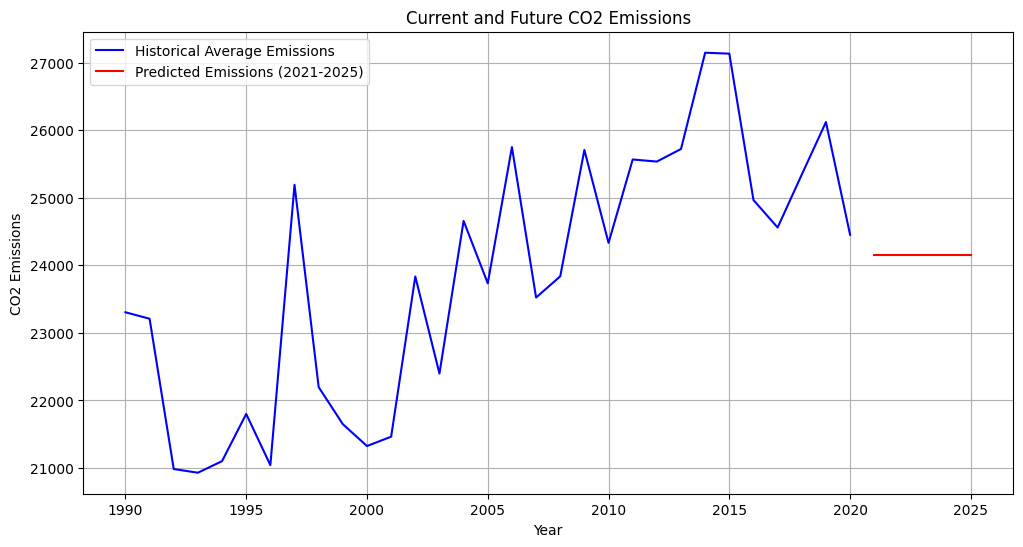

In [ ]:
import matplotlib.pyplot as plt

# Plot emissions
plt.figure(figsize=(12, 6))
plt.plot(avg_historical_data['Year'], avg_historical_data['total_emission'], label='Historical Average Emissions', color='blue')
plt.plot(future_data['Year'], future_data['total_emission'], label='Predicted Emissions (2021-2025)', color='red')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Current and Future CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()



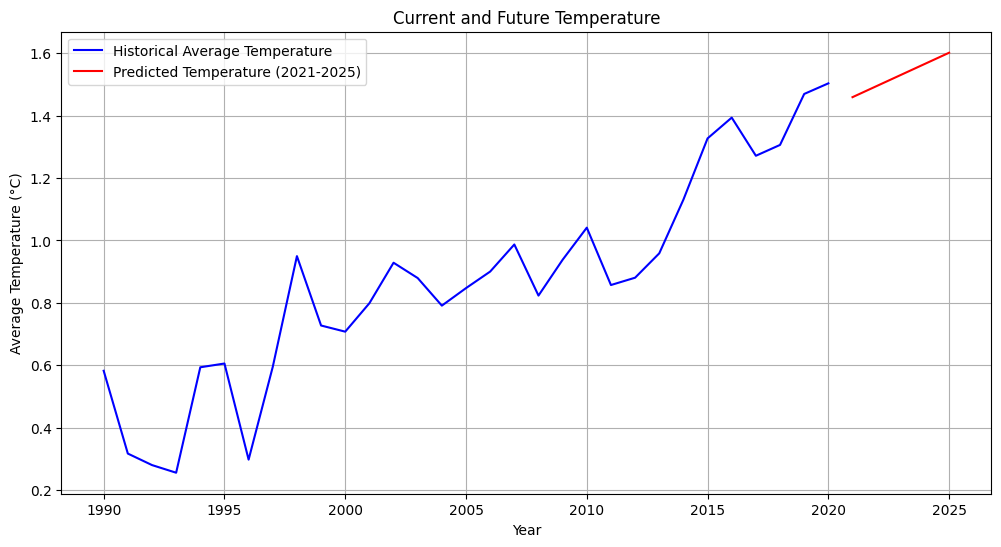

In [ ]:
# Plot temperature
plt.figure(figsize=(12, 6))
plt.plot(avg_historical_data['Year'], avg_historical_data['Average Temperature °C'], label='Historical Average Temperature', color='blue')
plt.plot(future_data['Year'], future_data['Average Temperature °C'], label='Predicted Temperature (2021-2025)', color='red')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Current and Future Temperature')
plt.legend()
plt.grid(True)
plt.show()
